In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
for i in data.columns:
    print(data[i].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64
0.625    94
0.550    94
0.575    93
0.580    92
0.600    87
         ..
0.075     1
0.815     1
0.110     1
0.150     1
0.800     1
Name: Length, Length: 134, dtype: int64
0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.610      1
0.650      1
0.620      1
0.095      1
0.615      1
Name: Diameter, Length: 111, dtype: int64
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.035      6
0.235      6
0.025      5
0.240      4
0.250      3
0.02

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    4177
dtype: int64

DATA VISUALIZATION


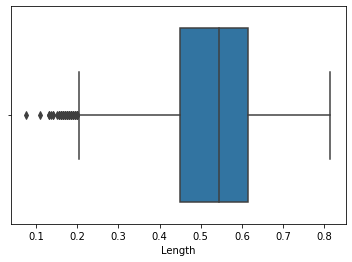

In [7]:
sns.boxplot(data=data,x="Length")

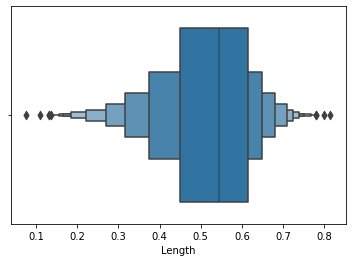

In [8]:
sns.boxenplot(data=data,x="Length")

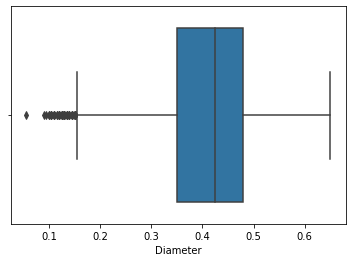

In [9]:
sns.boxplot(data=data,x="Diameter")

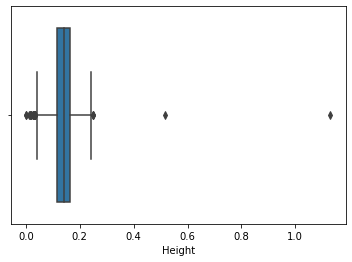

In [10]:
sns.boxplot(data=data,x="Height")

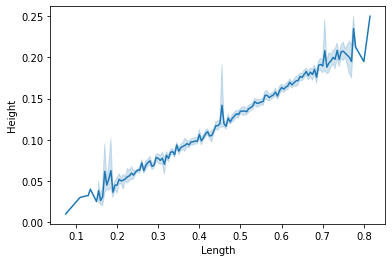

In [11]:
sns.lineplot(data=data,x="Length",y="Height")


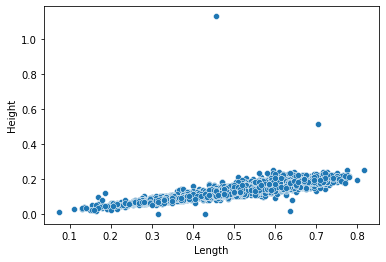

In [12]:
sns.scatterplot(data=data,x="Length",y="Height")

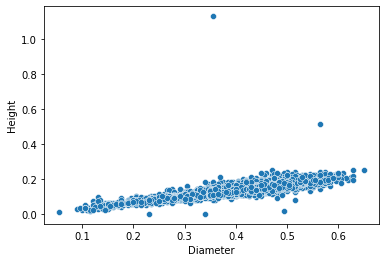

In [13]:
sns.scatterplot(data=data,x="Diameter",y="Height")

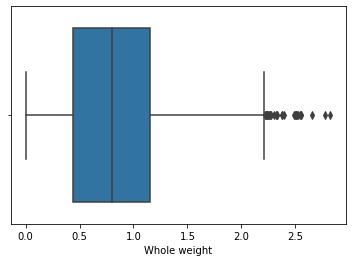

In [14]:
sns.boxplot(data=data,x="Whole weight")

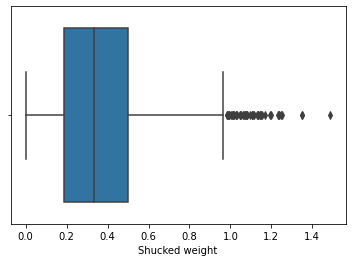

In [15]:
sns.boxplot(data=data,x="Shucked weight")

In [16]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

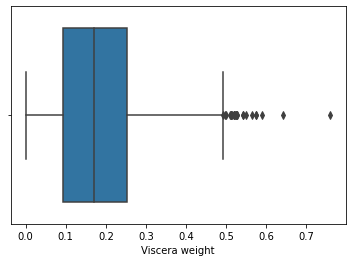

In [17]:
sns.boxplot(data=data,x="Viscera weight")

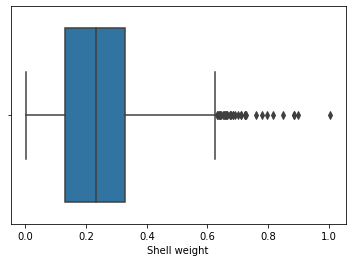

In [18]:
sns.boxplot(data=data,x="Shell weight")

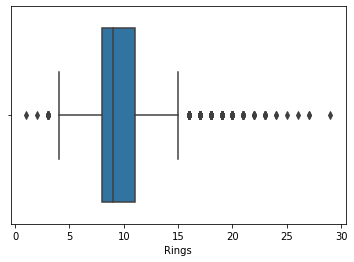

In [19]:
sns.boxplot(data=data,x="Rings")


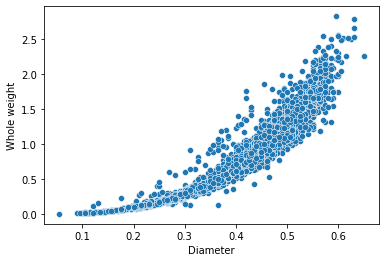

In [20]:
sns.scatterplot(data=data,x="Diameter",y="Whole weight")

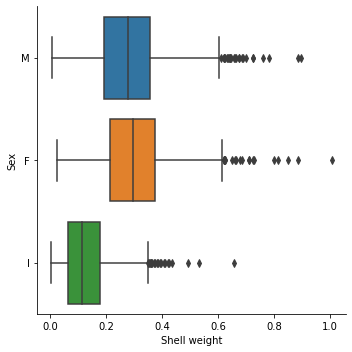

In [21]:
sns.catplot(x="Shell weight",y="Sex",data=data,kind='box')

In [22]:
data1=data[~(data["Height"]>0.4)]


In [23]:
data1=data1[~(data1["Length"]<0.15)]

In [24]:
data1=data1[~(data1["Shell weight"]>0.8)]

In [25]:
data1=data1[~(data1["Whole weight"]>2.5)]

In [26]:
data1=data1[~(data1["Shucked weight"]>1.2)]

In [27]:
data1.shape,data.shape

((4148, 9), (4177, 9))

In [28]:
data1["Age"]=data1["Rings"]+1.5

In [29]:
data1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


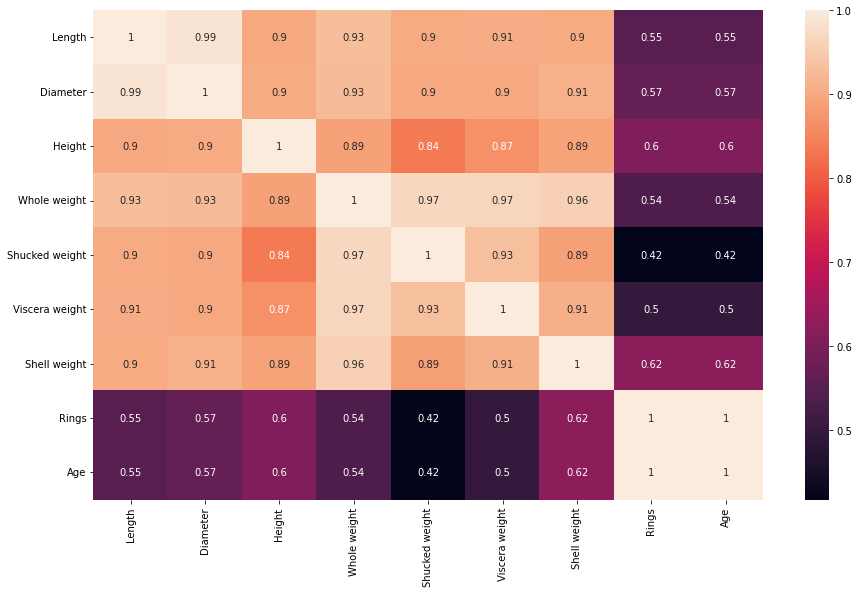

In [30]:
plt.figure(figsize=(15,9))
sns.heatmap(data1.corr(),annot=True)

In [31]:
q1=data1["Height"].quantile(0.25)
q3=data1["Height"].quantile(0.75)
iq=q3-q1
data2=data1[~((data1["Height"]<(q1-1.5*iq))|(data1["Height"]>(q3+1.5*iq)))]


In [32]:
q1=data2["Length"].quantile(0.25)
q3=data2["Length"].quantile(0.75)
iq=q3-q1
data2=data2[~((data2["Length"]<(q1-1.5*iq))|(data2["Length"]>(q3+1.5*iq)))]

In [33]:
q1=data2["Whole weight"].quantile(0.25)
q3=data2["Whole weight"].quantile(0.75)
iq=q3-q1
data2=data2[~((data2["Whole weight"]<(q1-1.5*iq))|(data2["Whole weight"]>(q3+1.5*iq)))]
data2.shape


(4084, 10)

In [34]:
x=data1.drop(columns=["Age","Rings"])
x["Sex"].replace({'M':2,'F':1,'I':0},inplace=True)
y=data1["Age"]

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1


array([[ 1.15517188, -0.57962568, -0.43426571, ..., -0.61179664,
        -0.72983642, -0.64298618],
       [ 1.15517188, -1.46650489, -1.4556039 , ..., -1.19199725,
        -1.21854392, -1.23398399],
       [-0.05270635,  0.05385947,  0.12747029, ..., -0.46326529,
        -0.35283349, -0.19973781],
       ...,
       [ 1.15517188,  0.64511228,  0.6892063 , ...,  0.78532642,
         1.00623881,  0.52423451],
       [-0.05270635,  0.856274  ,  0.79134012, ...,  0.81085524,
         0.75955788,  0.43558484],
       [ 1.15517188,  1.57422383,  1.50627685, ...,  2.73480045,
         1.83471439,  1.90569191]])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((3318, 8), (830, 8))

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


0.5676481741929682

In [38]:
from sklearn.linear_model import Lasso
lr1=Lasso(alpha=0.001)
lr1.fit(x_train,y_train)
lr1.score(x_test,y_test)

0.5672651558727646

In [39]:
from sklearn.linear_model import Ridge
r1=Ridge(alpha=0.01)
r1.fit(x_train,y_train)
r1.score(x_test,y_test)

0.5676440857767051

In [40]:
x_test[231],y_test[231]

(array([1.15517188, 0.56064759, 0.94454085, 0.28941484, 0.66861919,
        0.59734142, 0.79679274, 0.797571  ]), 15.5)

In [41]:
x_test[23],y_test[23]

(array([1.15517188, 0.89850634, 1.09774158, 0.68448704, 1.10789396,
        0.61126624, 1.57872474, 1.57325563]), 10.5)

In [42]:
lr.predict([x_test[231]])

array([13.06004481])

In [43]:
lr.predict([x_test[23]])

array([15.2756354])